# Decision Trees

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("heart_v2.csv")
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [3]:
df.shape

(270, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
age              270 non-null int64
sex              270 non-null int64
BP               270 non-null int64
cholestrol       270 non-null int64
heart disease    270 non-null int64
dtypes: int64(5)
memory usage: 10.6 KB


In [5]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [6]:
df['heart disease'].value_counts(normalize=True)

0    0.555556
1    0.444444
Name: heart disease, dtype: float64

## Train-Test split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('heart disease',axis=1)
y = df['heart disease'].copy()

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)
print(X_train.shape,X_test.shape)

(189, 4) (81, 4)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Building the Decision tree model

In [10]:
# Using all the default parameters except depth
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz

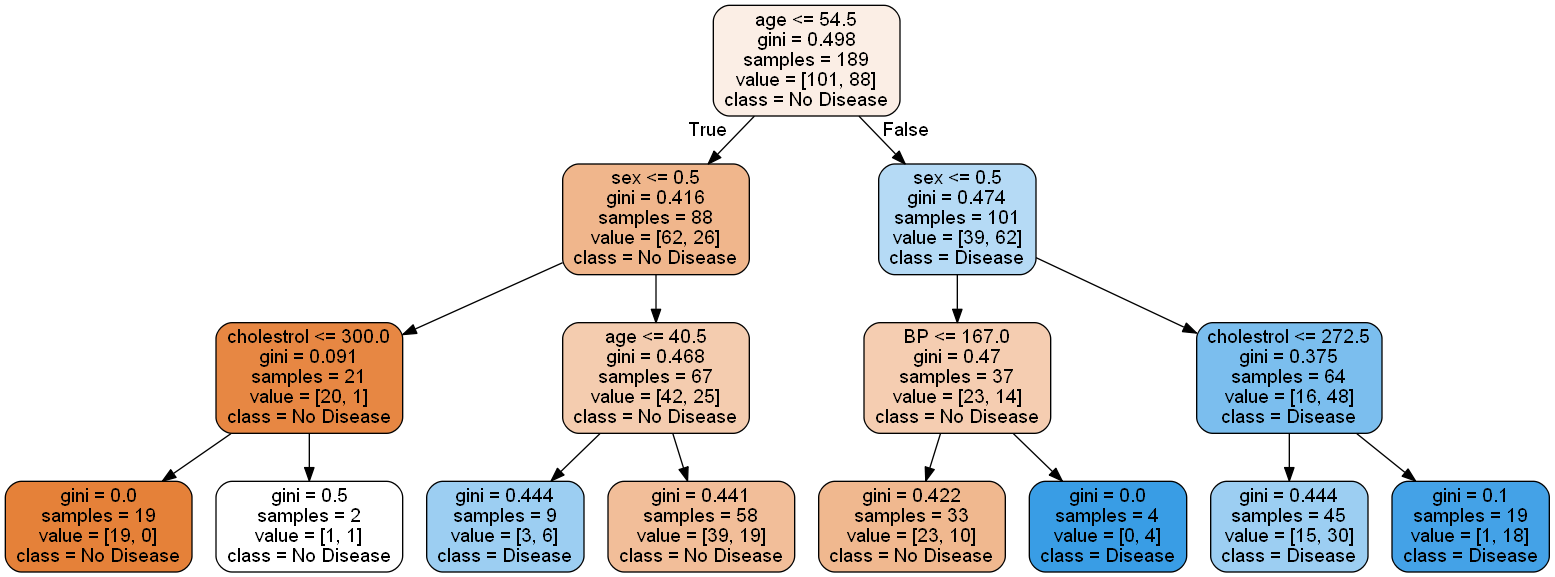

In [12]:
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
               feature_names= X.columns,
               class_names=['No Disease',"Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Evaluating the model performance

In [13]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [15]:
print("Performance on train dataset : ")
print(confusion_matrix(y_train,y_train_pred))
print(accuracy_score(y_train,y_train_pred))
print("*"*50)
print("Performance on test dataset : ")
print(confusion_matrix(y_test,y_test_pred))
print(accuracy_score(y_test,y_test_pred))

Performance on train dataset : 
[[82 19]
 [30 58]]
0.7407407407407407
**************************************************
Performance on test dataset : 
[[35 14]
 [18 14]]
0.6049382716049383


### Hyperparameters tuning
    Hyperparameter tuning can improve the performance of decision trees to a great extent.
    What are Hyperparameters?
    Hyperparamters are simply the parameters that we pass on the learning platform to control the training of the model.Hyperparameters are the choices that the algorithm designer make sto tune the behavior of the learning model

So basically anything that is passed to a algorithm  before it begins training or learning process is a hyperparameter. The process of optimizing hyperparamters is called hyperparameter tuning

Create helper functions to evaluate the model performance and create the graph for dt

In [20]:
def dt_get_graph(dt_classifier):
    dot_data = StringIO()

    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True,
                   feature_names= X.columns,
                   class_names=['No Disease',"Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    
    return graph

In [18]:
def evaluate_model(dt_classifier):
    print("Train Performance")
    print(accuracy_score(y_train,dt_classifier.predict(X_train)))
    print(confusion_matrix(y_train,dt_classifier.predict(X_train)))
    print("*"*50)
    print("Test Performance")
    print(accuracy_score(y_test,dt_classifier.predict(X_test)))
    print(confusion_matrix(y_test,dt_classifier.predict(X_test)))

In [19]:
evaluate_model(dt)

Train Performance
0.7407407407407407
[[82 19]
 [30 58]]
**************************************************
Test Performance
0.6049382716049383
[[35 14]
 [18 14]]


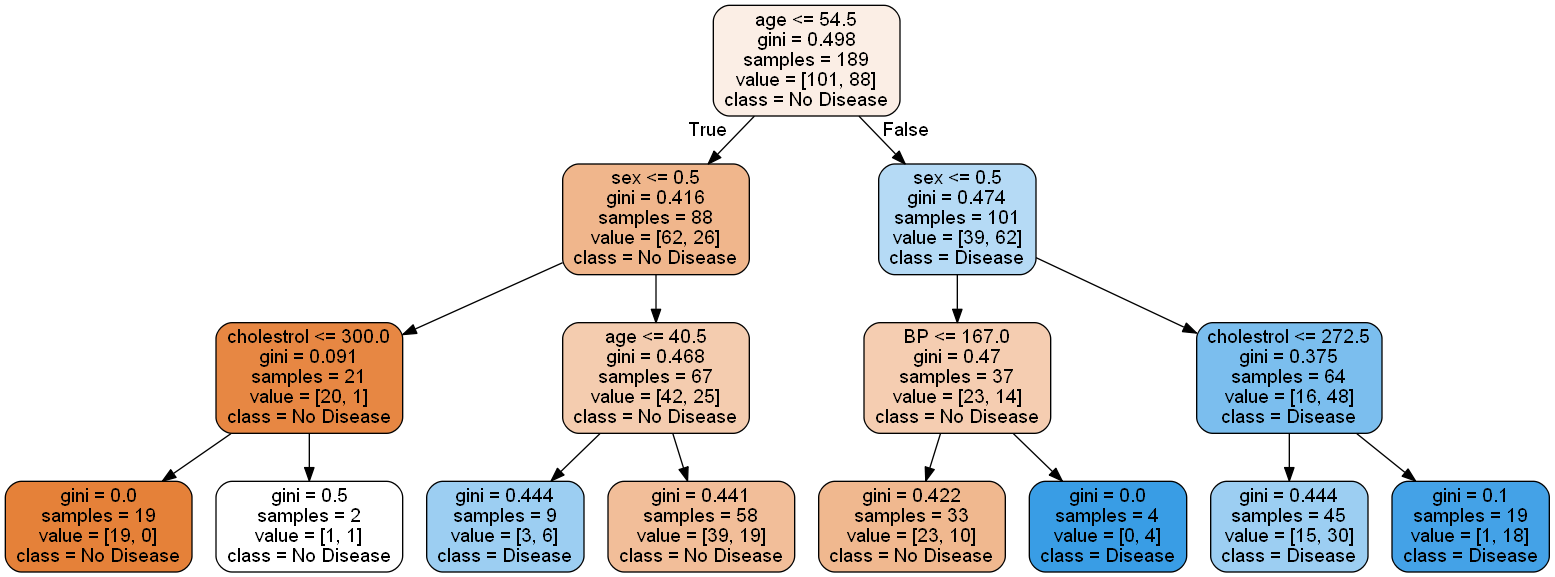

In [21]:
gph = dt_get_graph(dt)
Image(gph.create_png())

In [22]:
## Default Decision Tree
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

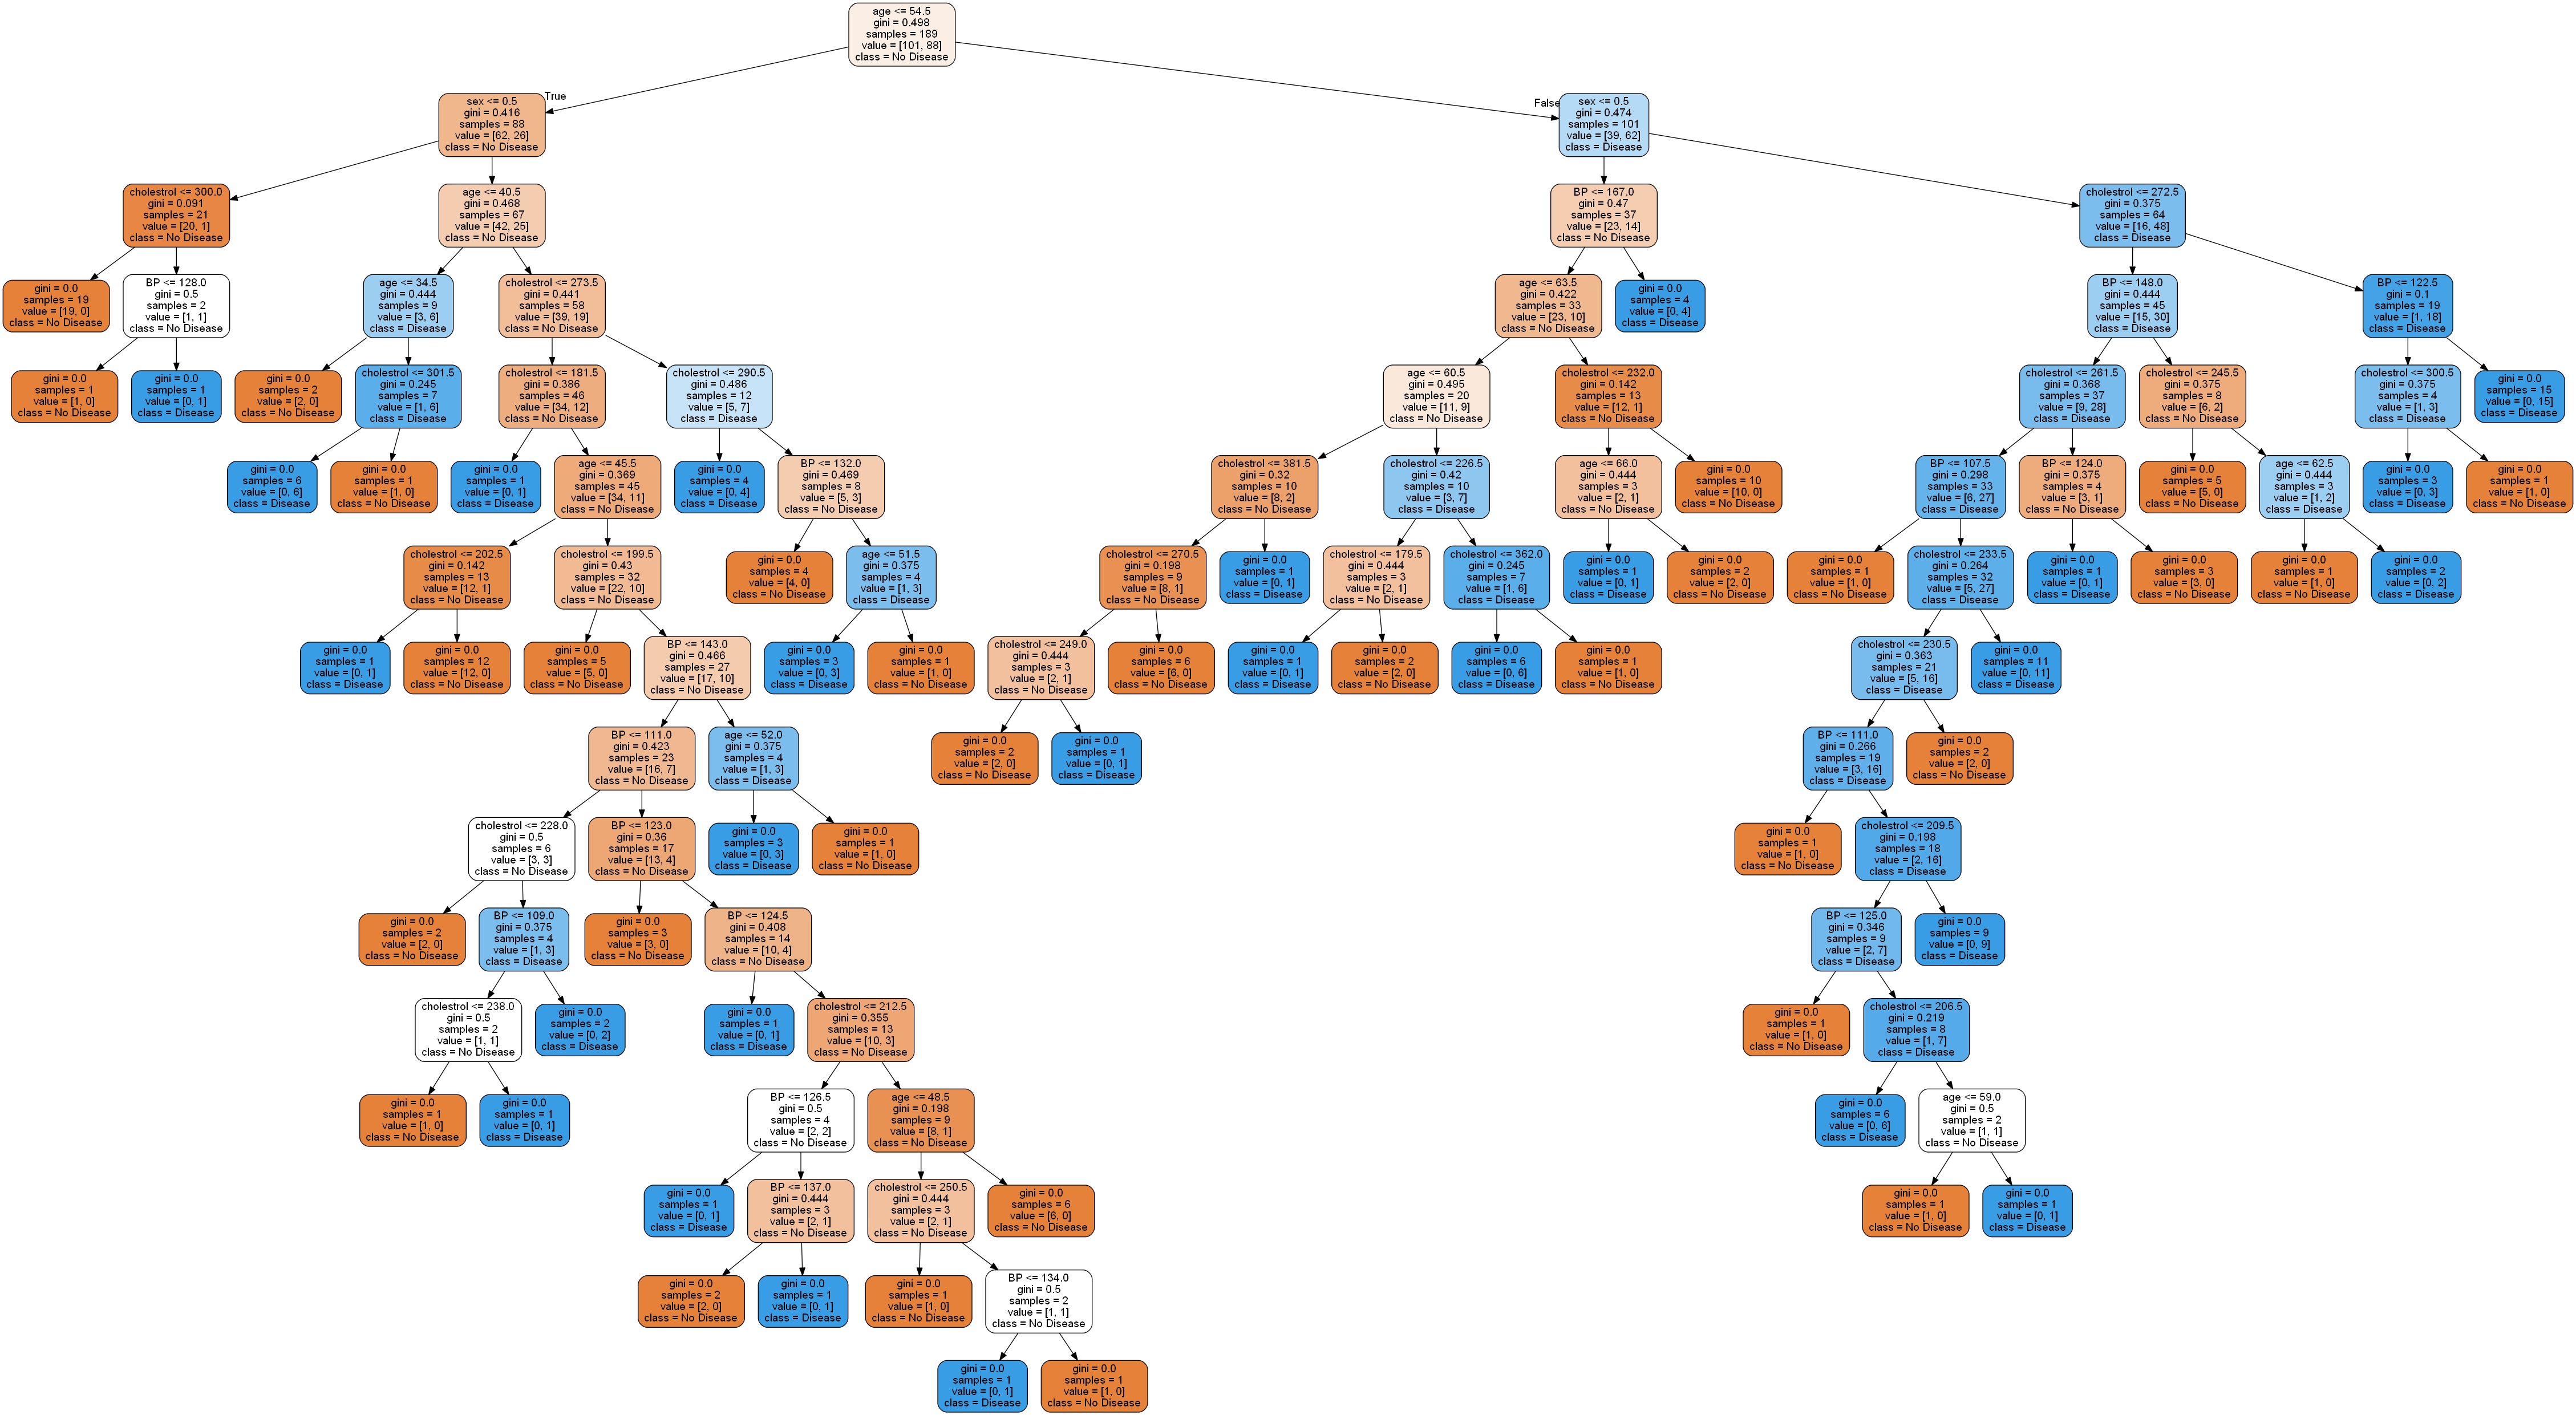

In [23]:
gph = dt_get_graph(dt_default)
Image(gph.create_png())

In [24]:
evaluate_model(dt_default)

Train Performance
1.0
[[101   0]
 [  0  88]]
**************************************************
Test Performance
0.6296296296296297
[[31 18]
 [12 20]]


## Controlling the depth of the tree

In [25]:
dt_depth =DecisionTreeClassifier(max_depth=3,random_state=42)
dt_depth.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [26]:
evaluate_model(dt_depth)

Train Performance
0.7407407407407407
[[82 19]
 [30 58]]
**************************************************
Test Performance
0.6049382716049383
[[35 14]
 [18 14]]


### Specifying the minimum samples before split

It specifies to limit on node size after which we shouldnt try to split 

In [28]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20,random_state=42)
dt_min_split.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [29]:
evaluate_model(dt_min_split)

Train Performance
0.8359788359788359
[[85 16]
 [15 73]]
**************************************************
Test Performance
0.6419753086419753
[[32 17]
 [12 20]]


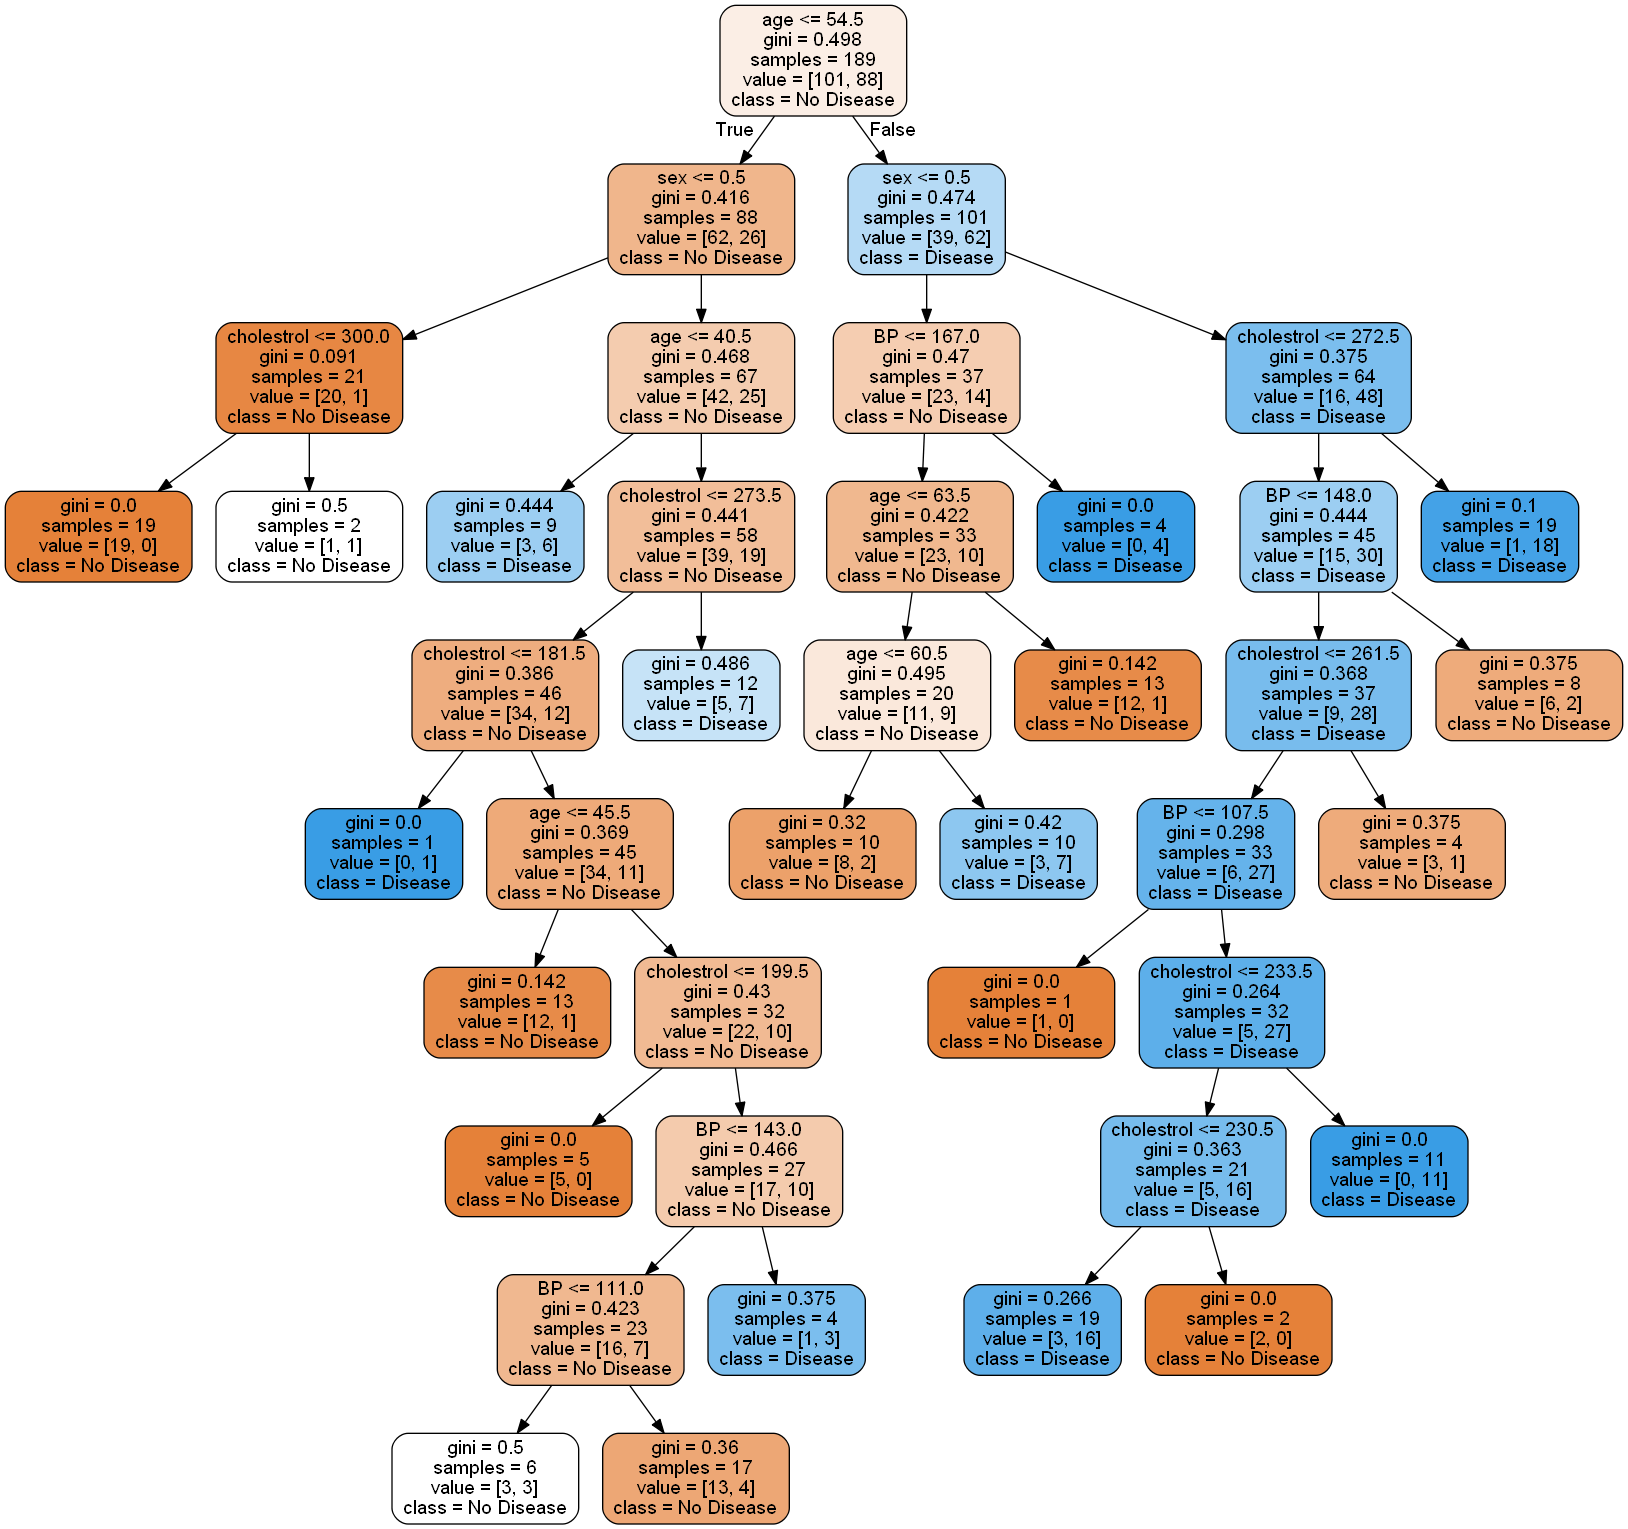

In [30]:
gph = dt_get_graph(dt_min_split)
Image(gph.create_png())

## Minimum samples in leaf node

In [31]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20,random_state=42)
dt_min_leaf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [32]:
evaluate_model(dt_min_leaf)

Train Performance
0.7037037037037037
[[85 16]
 [40 48]]
**************************************************
Test Performance
0.6419753086419753
[[38 11]
 [18 14]]


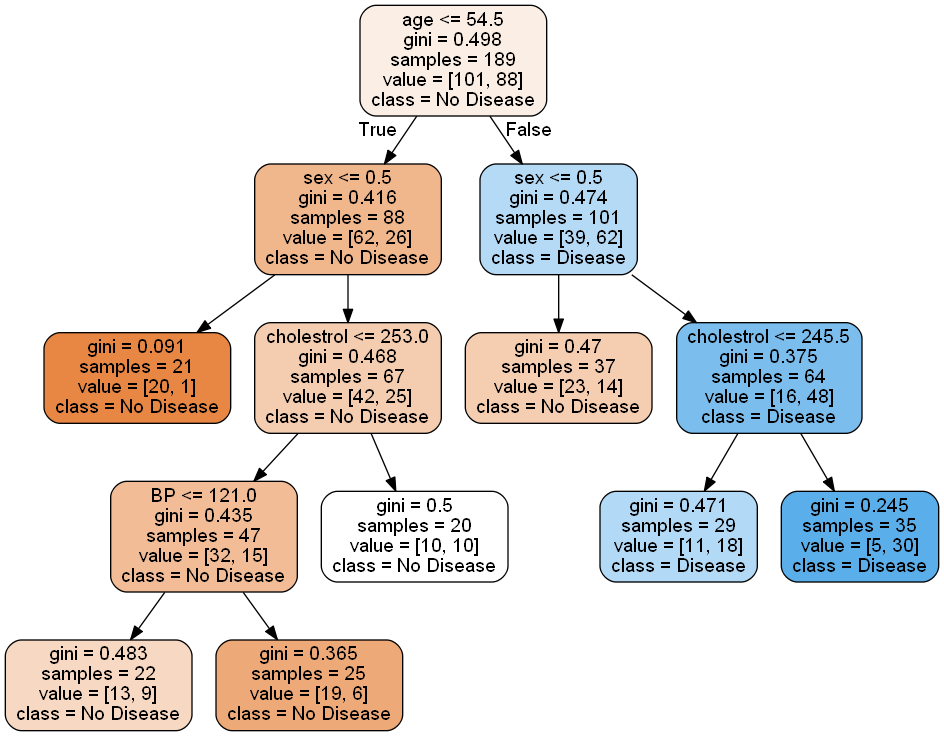

In [34]:
gph = dt_get_graph(dt_min_leaf)
Image(gph.create_png())

### How entropy can be used instead of using Gini since default is Gini

In [35]:
dt_entropy = DecisionTreeClassifier(min_samples_leaf=20,random_state=42,criterion="entropy")
dt_entropy.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [36]:
evaluate_model(dt_entropy)

Train Performance
0.7037037037037037
[[85 16]
 [40 48]]
**************************************************
Test Performance
0.6419753086419753
[[38 11]
 [18 14]]


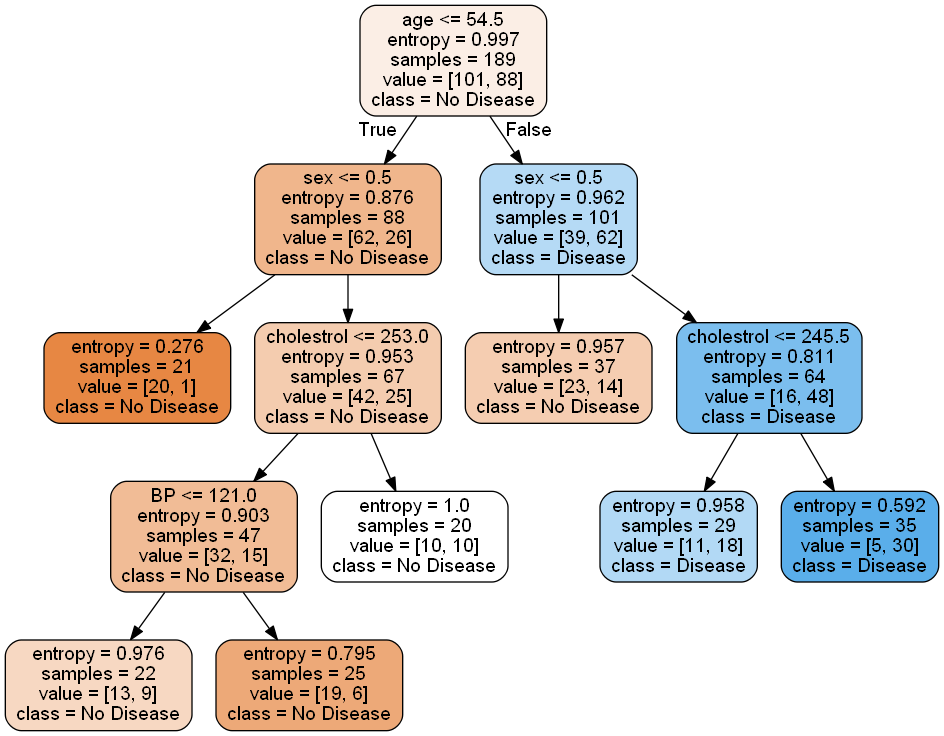

In [37]:
gph = dt_get_graph(dt_entropy)
Image(gph.create_png())

## Hyperparameter tuning using Gridsearch CV

In [38]:
dt = DecisionTreeClassifier(random_state=42)

In [39]:
from sklearn.model_selection import GridSearchCV

In [44]:
params = {
    'max_depth' : [2,3,5,10,20],
    'min_samples_leaf' : [5,10,20,50,100],
    'criterion' :['gini','entropy']
}

In [45]:
grid_search = GridSearchCV(estimator=dt,
            param_grid=params,
            cv=4,
            n_jobs=-1,
            verbose=1,
            scoring="accuracy")

In [46]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   24.0s finished


GridSearchCV(cv=4, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 5, 10, 20], 'min_samples_leaf': [5, 10, 20, 50, 100], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [49]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.003493,8.795223e-04,0.001004,0.000714,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,...,0.531915,0.650794,0.082649,13,0.730496,0.690141,0.732394,0.690141,0.710793,0.020663
1,0.002249,4.325002e-04,0.000499,0.000499,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,...,0.531915,0.650794,0.082649,13,0.730496,0.690141,0.732394,0.690141,0.710793,0.020663
2,0.002749,4.328442e-04,0.000749,0.000828,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.687500,0.744681,...,0.531915,0.645503,0.079399,19,0.709220,0.690141,0.732394,0.690141,0.705474,0.017385
3,0.001999,6.822063e-07,0.000750,0.000433,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,...,0.702128,0.656085,0.048628,2,0.652482,0.647887,0.683099,0.640845,0.656078,0.016141
4,0.002248,4.329818e-04,0.000250,0.000433,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.541667,0.531915,...,0.531915,0.534392,0.004245,41,0.531915,0.535211,0.535211,0.535211,0.534387,0.001427


In [50]:
cv_results.shape

(50, 21)

In [51]:
cv_results.nlargest(5,'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
30,0.002748,4.320186e-04,0.00000,0.000000,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.765957,...,0.680851,0.666667,0.064083,1,0.765957,0.704225,0.760563,0.739437,0.742546,0.024243
3,0.001999,6.822063e-07,0.00075,0.000433,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,...,0.702128,0.656085,0.048628,2,0.652482,0.647887,0.683099,0.640845,0.656078,0.016141
5,0.001999,4.578320e-07,0.00050,0.000500,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.625000,0.744681,...,0.659574,0.656085,0.055730,2,0.773050,0.718310,0.774648,0.739437,0.751361,0.023703
8,0.002249,4.329126e-04,0.00025,0.000433,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.666667,0.680851,...,0.702128,0.656085,0.048628,2,0.652482,0.647887,0.683099,0.640845,0.656078,0.016141
13,0.001998,9.684608e-07,0.00075,0.000433,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.666667,0.680851,...,0.702128,0.656085,0.048628,2,0.652482,0.647887,0.683099,0.640845,0.656078,0.016141


In [52]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [53]:
grid_search.best_score_

0.6666666666666666

In [54]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}

In [55]:
dt_best = grid_search.best_estimator_

In [56]:
evaluate_model(dt_best)

Train Performance
0.7195767195767195
[[82 19]
 [34 54]]
**************************************************
Test Performance
0.6172839506172839
[[36 13]
 [18 14]]


In [57]:
# Using RandomForest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
X_train.head()

,age,sex,BP,cholestrol
84,57,1,110,201
251,44,1,130,219
92,54,1,124,266
201,58,1,125,300
126,62,1,120,267


In [60]:
y_train.head()

84     0
251    0
92     1
201    1
126    1
Name: heart disease, dtype: int64

In [61]:
rf = RandomForestClassifier(random_state=42,max_depth=3,n_estimators=10)

In [62]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [63]:
rf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1608637542, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1273642419, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_frac

In [64]:
rf.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1608637542, splitter='best')

In [65]:
sample_tree = rf.estimators_[5]

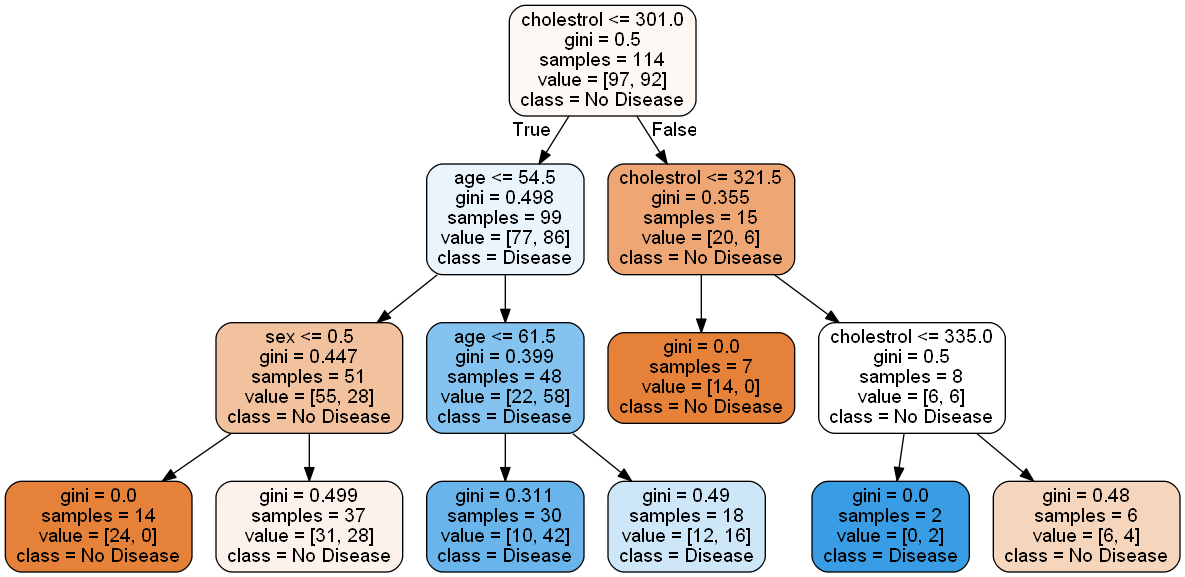

In [66]:
gph = dt_get_graph(sample_tree)
Image(gph.create_png())

# OOB score

In [67]:
rf = RandomForestClassifier(random_state=42,max_depth=3,n_estimators=10,oob_score=True)

In [68]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [69]:
rf.oob_score_

0.6349206349206349

In [70]:
# Hyper tuning
classifier_rf = RandomForestClassifier(random_state=42,n_jobs=-1)

In [76]:
params = {
    'max_depth':[1,2,5,10,20],
    'min_samples_leaf':[5,10,20,50,100],
    'max_features':[2,3,4],
    'n_estimators':[10,30,50,100,200]
}

In [77]:
# Instantiating the grid search model
grid_search = GridSearchCV(estimator=classifier_rf,param_grid=params,
                          cv=4,n_jobs=-1,verbose=1,scoring="accuracy")

In [78]:
grid_search.fit(X,y)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  4.6min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 5, 10, 20], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_features': [2, 3, 4], 'n_estimators': [10, 30, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [79]:
rf_best = grid_search.best_estimator_

In [80]:
rf_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [81]:
evaluate_model(rf_best)

Train Performance
0.8042328042328042
[[87 14]
 [23 65]]
**************************************************
Test Performance
0.8024691358024691
[[42  7]
 [ 9 23]]


# Variable importance in Random Forest and Decsion Trees

In [82]:
classifier_rf = RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100,oob_score=True)

In [83]:
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [84]:
classifier_rf.feature_importances_

array([0.37539743, 0.13780788, 0.20834585, 0.27844883])

In [85]:
imp_df = pd.DataFrame({
    'Varname': X_train.columns,
    'Imp': classifier_rf.feature_importances_
})

In [86]:
imp_df.sort_values(by='Imp',ascending=False)

,Varname,Imp
0,age,0.375397
3,cholestrol,0.278449
2,BP,0.208346
1,sex,0.137808
